ECG 데이터 이상탐지를 해봅시다

http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

https://www.tensorflow.org/tutorials/generative/autoencoder

In [5]:
import pandas as pd
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = df.values


In [6]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [7]:
df[140].value_counts()

1.0    2919
0.0    2079
Name: 140, dtype: int64

Text(0.5, 1.0, '0.0')

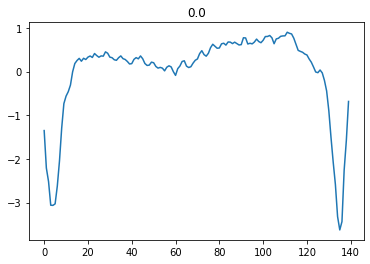

In [8]:
import matplotlib.pyplot as plt
row = -1
df.iloc[row,:-1].plot()
plt.title(df.iloc[row,-1])

In [9]:
# 마지막 열이 라벨임, 분리하여 dataset 만듦

from sklearn.model_selection import train_test_split

labels = raw_data[:, -1]
data = raw_data[:, :-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [10]:
train_data.shape

(3998, 140)

In [11]:
train_labels

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
type(train_data)

numpy.ndarray

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

model = models.Sequential([encoder, decoder])

In [14]:
model.compile(optimizer='adam', loss='mae')

In [16]:
# [0,1]로 데이터 정규화
min_val = train_data.min()
max_val = train_data.max()

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)


In [17]:
train_data

array([[0.57030466, 0.46561659, 0.29058117, ..., 0.48504233, 0.42335019,
        0.47598344],
       [0.48320587, 0.28246963, 0.16471254, ..., 0.56756701, 0.46772939,
        0.26923291],
       [0.48144641, 0.35151403, 0.25972766, ..., 0.54794209, 0.50775438,
        0.54298664],
       ...,
       [0.41039048, 0.24164985, 0.13120877, ..., 0.52773129, 0.56540911,
        0.50238847],
       [0.53977477, 0.41407858, 0.28101392, ..., 0.51266516, 0.43706054,
        0.44268649],
       [0.29639772, 0.15988175, 0.18883787, ..., 0.53766964, 0.54578602,
        0.40826709]])

In [19]:
# 정상:1, 비정상:0 데이터 분류
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [21]:
len(normal_train_data)

2359

In [22]:
history = model.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 61ms/step - loss: 0.0584 - val_loss: 0.0533
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0561 - val_loss: 0.0519
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0538 - val_loss: 0.0502
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0504 - val_loss: 0.0487
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0462 - val_loss: 0.0473
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0420 - val_loss: 0.0442
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0380 - val_loss: 0.0421
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0347 - val_loss: 0.0412
Epoch 9/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0319 - val_loss: 0.0393
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0296 - val_loss: 0.0385
Epoch 11/20
5/5 [============

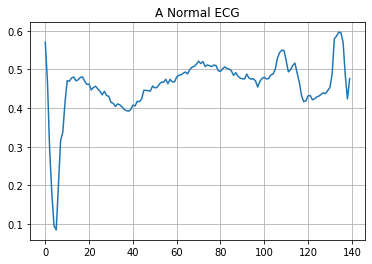

In [23]:
# 정상데이터 출력
import numpy as np
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

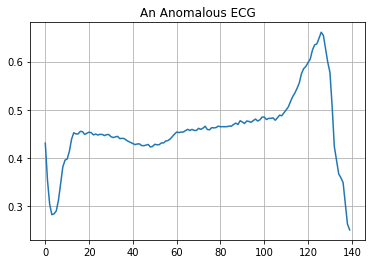

In [24]:
# 비정상 데이터 출력
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

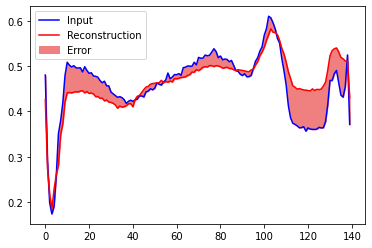

In [25]:
# 정상데이터로 훈련된 autoencoder에서 예측값과 입력 데이터를 비교

decoded_imgs = model.predict(normal_test_data)

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

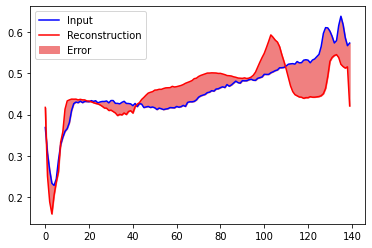

In [26]:
# 정상데이터로 훈련된 autoencoder에서 예측값과 입력 데이터를 비교

# 비정상 데이터를 입력으로 넣어보자
decoded_imgs = model.predict(anomalous_test_data)

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [27]:
# 정상데이터의 오차범위 확인
reconstructions = model.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

(array([1045.,  715.,  390.,   84.,   45.,   35.,   27.,   11.,    2.,
           5.]),
 array([0.00625001, 0.01545774, 0.02466547, 0.0338732 , 0.04308093,
        0.05228866, 0.06149638, 0.07070411, 0.07991184, 0.08911957,
        0.0983273 ]),
 <a list of 10 Patch objects>)

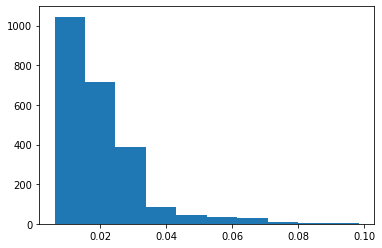

In [28]:
plt.hist(train_loss)

In [29]:
# 비정상 데이터 오차범위 확인
reconstructions2 = model.predict(anomalous_train_data)
train_loss2 = tf.keras.losses.mae(reconstructions2, anomalous_train_data)

(array([  4.,  30., 151., 574., 639., 186.,  31.,  12.,   8.,   4.]),
 array([0.02056861, 0.02766966, 0.03477071, 0.04187176, 0.04897281,
        0.05607386, 0.06317491, 0.07027596, 0.07737701, 0.08447806,
        0.09157911]),
 <a list of 10 Patch objects>)

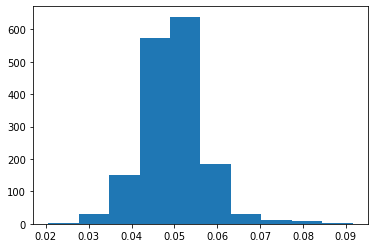

In [30]:
plt.hist(train_loss2)

In [31]:
# 정상데이터의 1표준편차 이상을 이상치로 판별해보자, 
threshold = np.mean(train_loss) + np.std(train_loss)

In [32]:
# 비정상 test data 
reconstructions3 = model.predict(anomalous_test_data)
test_loss3 = tf.keras.losses.mae(reconstructions3, anomalous_test_data)

In [33]:
test_loss3< threshold


<tf.Tensor: shape=(440,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

In [34]:
# test data 
reconstructions4 = model.predict(test_data)
test_loss4 = tf.keras.losses.mae(reconstructions4, test_data)

In [35]:
preds=test_loss4< threshold

In [36]:
test_labels

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(test_labels, preds))
print(precision_score(test_labels, preds))
print(recall_score(test_labels, preds))

0.944
0.9921875
0.9071428571428571


AutoEncoder는 차원 축소에도 사용할 수 있습니다

https://towardsdatascience.com/autoencoders-vs-pca-when-to-use-which-73de063f5d7